
the code is all about sentimental analysis in this we are using cnn lstm model for achieving higher accuracy.we are calculating specificity,precision,recall,f1 score,etc. to analyse model in a better way we had done pre processing to clean our data and finf patters and to remove noise present in the data.splitting the data set into training and testing ratio loading the model and giving checkpoint at the end creating roc curve and confusion matrix.
---



In [2]:
##pandas library is used for data manipulation
#pandas is imported to work with datset
import pandas as pd
#using csv to read and manipulate on tabualr data
import csv
# used to perform operations
import re
import nltk
#collection of text documents
from nltk.corpus import stopwords
#making words more understandable for machine
from nltk.stem import WordNetLemmatizer
#for polarity operation
from textblob import TextBlob
#sklearn is used for stastical modeling
from sklearn.preprocessing import LabelEncoder
#used for various curve plot,great visualization
from sklearn.metrics import roc_curve, auc,confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
#do graph comparisions for better understanding of data
import seaborn as sns
#implement mathematical operations on array
import numpy as np
#helps to plot graphs
import matplotlib.pyplot as py
#for splitting of data into training and testing
from sklearn.model_selection import train_test_split
#used for analysis and comparision
import tensorflow as tf
#used for analysis and comparision
from tensorflow.keras.models import Sequential
#it isused to process in bothe the directions ,improves understanding
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
# adam is used to improve its accuracy and speed
from tensorflow.keras.optimizers import Adam
#transform a list of number of samples sequences into a 2d array of shape
from tensorflow.keras.preprocessing.sequence import pad_sequences
# used for the conversion of categorical variable into numerical format
from sklearn.preprocessing import LabelEncoder



In [3]:
#reading and gaining access to the data
amazonData = pd.read_csv("/content/drive/MyDrive/RiyaSingh/amazon_reviews_us_Mobile_Electronics_v1_00 (1).tsv", delimiter='\t', quoting=csv.QUOTE_NONE)

In [4]:
#column on which we will perform
review = amazonData['review_body']

# CASEFOLDING TOKENIZATION

In [5]:
# Download NLTK resources (stopwords and lemmatization)
#stopwords are used to filter the paragraph
nltk.download('stopwords')
#organize words into synsets
nltk.download('wordnet')
# Create stopwords set
s_w = set(stopwords.words('english'))
# Create lemmatiz's object
lemmatizer = WordNetLemmatizer()
def tokenization(text):
    # Check if text is a valid string
    if isinstance(text, str):
        # Whitespaces and punctuations
        tokens = re.findall(r'\b\w+\b', text)
        return tokens
    else:
        return []
def case_folding(tokens):
    l_t = [token.lower() for token in tokens]
    return l_t
def r_s(tokens):
    fil_tok = [token for token in tokens if token not in s_w]
    return fil_tok
def move_punctu(tokens):
    # deleting non-alphanumeric characters
    alphan_tok = [re.sub(r'\W+', '', token) for token in tokens]
    return alphan_tok
def lemmatization(tokens):
    lematiz_tok = [lemmatizer.lemmatize(token) for token in tokens]
    return  lematiz_tok
# Tokenization
amazonData['tokenized_text'] = amazonData['review_body'].apply(tokenization)
# Case folding
amazonData['lowercase_text'] = amazonData['tokenized_text'].apply(case_folding)
# Remove stopwords
amazonData['without_stopwords'] = amazonData['lowercase_text'].apply(r_s)
# Remove punctuation
amazonData['without_punctuation'] = amazonData['without_stopwords'].apply(move_punctu)
# Lemmatization
amazonData['lemmatized_text'] = amazonData['without_punctuation'].apply(lemmatization)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
# Calculate polarity
amazonData["polarity"] = amazonData['lemmatized_text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
# Categorize tweets as positive, negative, or neutral based on polarity
amazonData["sentiment"] = amazonData["polarity"].apply(lambda x: "positive" if x > 0 else "negative")
# Count the values in the sentiment column
sentiment_counts = amazonData["sentiment"].value_counts()
print(sentiment_counts)

positive    86395
negative    18580
Name: sentiment, dtype: int64


In [7]:
#assigning values to x and y
X=amazonData['lemmatized_text']
y=amazonData['sentiment']

In [8]:
#printing data in x
X

0         [advertised, everything, work, perfectly, happ...
1                                                   [great]
2          [work, great, fit, life, proof, case, iphone, 6]
3         [work, well, get, used, hearing, anything, ear...
4         [careful, product, bought, several, camera, im...
                                ...                        
104970    [looking, purr, fect, solution, clean, inevita...
104971    [live, apartment, hardwood, floor, carpet, wan...
104972    [received, birthday, present, best, 1, dog, 1,...
104973    [got, dirt, devil, spot, scrubber, gift, chris...
104974    [purchased, three, week, ago, along, new, pupp...
Name: lemmatized_text, Length: 104975, dtype: object

In [9]:
#printing data in y
y

0         positive
1         positive
2         positive
3         negative
4         positive
            ...   
104970    positive
104971    positive
104972    positive
104973    positive
104974    positive
Name: sentiment, Length: 104975, dtype: object

In [10]:
# Separate features (X) and target variable (y)
X=amazonData['lemmatized_text']
y = amazonData['sentiment']
# Make a new LabelEncoder object.
lbl_en = LabelEncoder()
# Convert the target variable to numerical values by fitting it.
y_encoded = lbl_en.fit_transform(y)
# The classes are now encoded as 0 and 1
y_df = pd.DataFrame(y_encoded, columns=['sentiment_encoded'])


In [11]:
y_df

,sentiment_encoded
0,1
1,1
2,1
3,0
4,1
...,...
104970,1
104971,1
104972,1
104973,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# #CNN LSTM MODEL

In [13]:
# Initialize
tokenizer = tf.keras.preprocessing.text.Tokenizer()

tokenizer.fit_on_texts(X_train)

Xt_seq = tokenizer.texts_to_sequences(X_train)

Xte_seq = tokenizer.texts_to_sequences(X_test)
max_length = max(len(seq) for seq in Xt_seq)

# Calculate the vocabulary size
v_s = len(tokenizer.word_index) + 1

# Pad sequences to have the same length
Xtp = pad_sequences(Xt_seq, maxlen=max_length)
X_test_padded = pad_sequences(Xte_seq, maxlen=max_length)

# Set the dimensionality of the embedding
embedding_dim = 128


In [14]:
# make a object of LabelEncoder
lbl_en = LabelEncoder()
yt_en = lbl_en.fit_transform(y_train)
yte_en = lbl_en.transform(y_test)
# Convert the target variable to float
y_train = yt_en.astype(float)
y_test = yte_en.astype(float)

In [15]:
# Importing the necessary library for building a sequential model
model = Sequential()

# Add an Embedding layer to capture semantic relationships and contextual information between words.
model.add(Embedding(input_dim=v_s, output_dim=embedding_dim, input_length=max_length))

# Adding a 1D Convolutional layer with ReLU activation
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

# Adding a MaxPooling layer to reduce dimensionality by selecting the maximum value from neighboring elements.
model.add(MaxPooling1D(pool_size=2))

# Adding an LSTM (Long Short-Term Memory) layer to capture sequential dependencies in the data.
model.add(LSTM(units=64))

# Adding a Dense  non-linearity.
model.add(Dense(units=64, activation='relu'))

# Adding a Dropout layer to mitigate overfitting by randomly deactivating 50% of neurons during training.
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Setting up the Adam optimizer with a learning rate of 0.001.
opt = Adam(learning_rate=0.001)

# Compiling
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1492, 128)         5932800   
                                                                 
 conv1d (Conv1D)             (None, 1488, 64)          41024     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 744, 64)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [17]:
history=model.fit(Xtp, y_train, batch_size=512, epochs=5, validation_data=(X_test_padded, y_test))

Epoch 1/5
165/165 [==============================] - 61s 282ms/step - loss: 0.2860 - accuracy: 0.8864 - val_loss: 0.1279 - val_accuracy: 0.9486
Epoch 2/5
165/165 [==============================] - 41s 247ms/step - loss: 0.0722 - accuracy: 0.9741 - val_loss: 0.0909 - val_accuracy: 0.9677
Epoch 3/5
165/165 [==============================] - 38s 228ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 0.0894 - val_accuracy: 0.9686
Epoch 4/5
165/165 [==============================] - 36s 217ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.1070 - val_accuracy: 0.9668
Epoch 5/5
165/165 [==============================] - 34s 206ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.1376 - val_accuracy: 0.9671


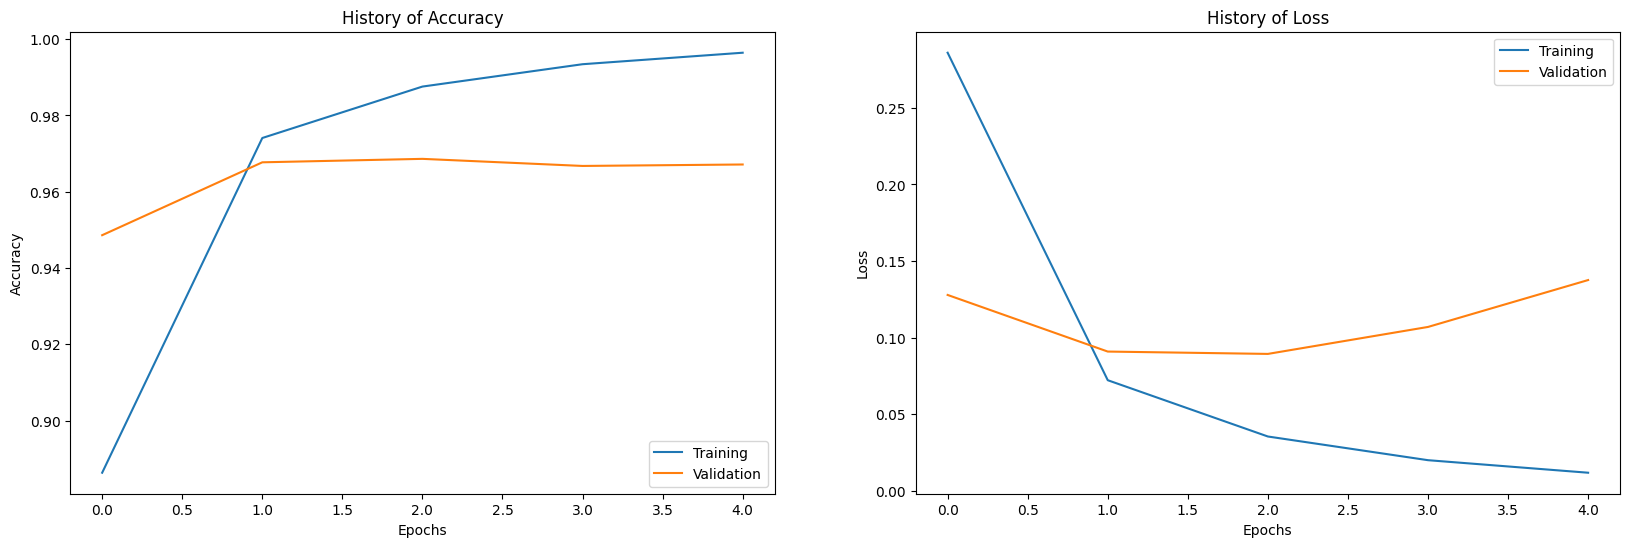

In [20]:
#accuracy is stored in a variable acc
acc = history.history['accuracy']
#validation accuracy is stored inval_accuracy
v_acc = history.history['val_accuracy']
#loss in model
loss = history.history['loss']
#validation loss is stored in val_loss
val_loss = history.history['val_loss']
# number of iterations
epochs_range = range(5)
py.figure(figsize=(20, 6))
py.subplot(1, 2, 1)  # One row, two columns, first subplot
 # One row, two columns, first subplot
py.plot(epochs_range, acc, label='Training')
#plotting  agter data is cleaned
py.plot(epochs_range, v_acc, label='Validation')
#displaying epochs on x label
py.xlabel('Epochs')
#displaying accuracy on y labels
py.ylabel('Accuracy')
#legend provide information related to curve at a particular location
py.legend(loc='lower right')
py.title('History of Accuracy')
py.subplot(1, 2, 2)  # One row, two columns, second subplot
py.plot(epochs_range, loss, label='Training')
py.plot(epochs_range, val_loss, label='Validation')
#setting a label for x
py.xlabel('Epochs')
#setting a label for y
py.ylabel('Loss')
#provide meaning to the visualization
py.legend(loc='upper right')
#name of the plot
py.title('History of Loss')
#display the plot
py.show()

#TESTING RESULTS

In [21]:
model.evaluate(X_test_padded, y_test)

657/657 [==============================] - 8s 12ms/step - loss: 0.1376 - accuracy: 0.9671


[0.1375938057899475, 0.9671350121498108]

In [22]:
# applying predictions on  testing set
y_pd = model.predict(X_test_padded)
y_pd_labels = (y_pd > 0.5).astype(int)
# Convert the true labels to integers (in case they are in float format)
y_test_int = y_test.astype(int)
acc = accuracy_score(y_pd_labels, y_test_int)

657/657 [==============================] - 8s 11ms/step


In [23]:
cm = confusion_matrix(y_test_int, y_pd_labels)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
misclassification_rate = (fp + fn) / (tn + fp + fn + tp)

In [24]:
print("Testing accuracy of CNN LSTM:", acc)
precio = precision_score(y_pd_labels, y_test_int)
print("Testing precision of CNN LSTM:", precio)
recallsc = recall_score(y_pd_labels, y_test_int)
print("Testing recall score of CNN LSTM:", recallsc)
f1sc = f1_score(y_pd_labels, y_test_int)
# Print the F1 score of the model on the testing set
print("Testing F1_score of CNN LSTM:", f1sc)
print("Testing Specificity of LSTM:", specificity)
print("Testing Misclassification Rate of LSTM:", misclassification_rate)


Testing accuracy of CNN LSTM: 0.967135032150512
Testing precision of CNN LSTM: 0.9889531521110468
Testing recall score of CNN LSTM: 0.9716445050573929
Testing F1_score of CNN LSTM: 0.9802224260490714
Testing Specificity of LSTM: 0.8653171390013495
Testing Misclassification Rate of LSTM: 0.032864967849487975


In [25]:
cm = confusion_matrix(y_test_int, y_pd_labels)
# Compute and show the classification report
report = classification_report(y_test_int, y_pd_labels)
print("Classification Report of testing data:")
print(report)

Classification Report of testing data:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3705
           1       0.97      0.99      0.98     17290

    accuracy                           0.97     20995
   macro avg       0.96      0.93      0.94     20995
weighted avg       0.97      0.97      0.97     20995



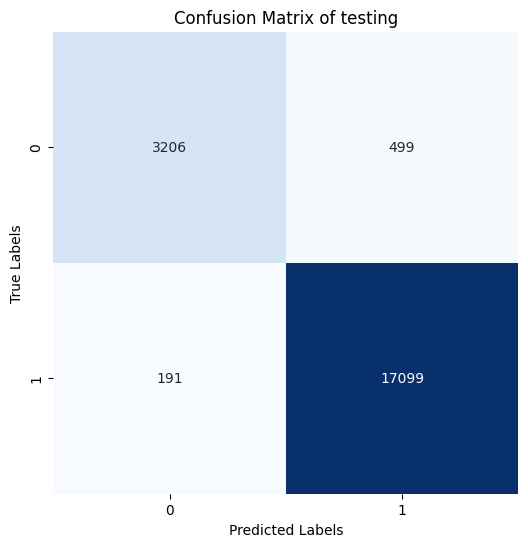

In [26]:
# Plot the confusion matrix
#contains all the elements to plot the graph
py.figure(figsize=(6, 6))
#demonstrating the relationship between variables, including time
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#A figure's axis labels can be added, and their text characteristics can be changed
py.xlabel('Predicted Labels')
#Customise the axis labels' text characteristics by adding them to a figure.
py.ylabel('True Labels')
py.title('Confusion Matrix of testing')
#display of the matrix
py.show()


To measure the efficacy of a machine learning model, especially a Multinomial Naive Bayesian classifier, this code implements the ROC curve. The ROC curve demonstrates the model's ability to discriminate across groups.
This is what each component does:
The ROC curve's FPR, TPR, and threshold values are all derived from the model's assumptions and the actual labels.
The ROC curve's area under the curve (AUC) is determined. The AUC tells us how well the model generally performs, with a larger number indicating greater performance.
A plot (graph) of the ROC curve is generated by the code. On the graph, the curve appears as a straight line. The AUC score is shown as the area under the orange line, which shows the performance of the model.
A blue dashed line is drawn at a 45 degree angle, going from the lower left to the upper right. The results of a completely arbitrary classifier are shown below.


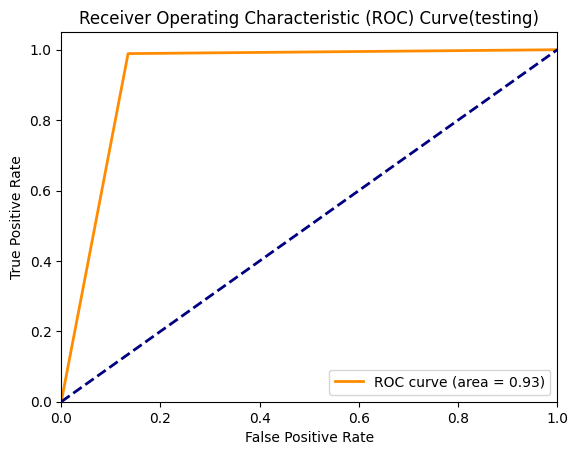

In [27]:
#The threshold values are discarded and these values are transferred to the variables fpr and tpr, respectively.
fpr, tpr, thresholds = roc_curve(y_test_int, y_pd_labels)
#determines the AUC
roc_auc = auc(fpr, tpr)
#rounded to four decimal places, labelling the curve with the Multinomial Naive Bayes' ROC AUC score.
py.figure()
#required data
py.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#lines to display
py.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#x and y limits
py.xlim([0.0, 1.0])
py.ylim([0.0, 1.05])
#set the label for the x axis specifying the positive label for the binary classification
py.xlabel('False Positive Rate')
#set the label for the y axis specifying the positive label for the binary classification
py.ylabel('True Positive Rate')
py.title('Receiver Operating Characteristic (ROC) Curve(testing)')
py.legend(loc="lower right")
#displaying the respective graph
py.show()


# TRAINING RESULTS

In [28]:
model.evaluate(Xtp, y_train)

2625/2625 [==============================] - 30s 12ms/step - loss: 0.0055 - accuracy: 0.9983


[0.005538244266062975, 0.9983091354370117]

In [29]:
# Make predictions on the training set using the trained model
y_pd = model.predict(Xtp)

# Conversion of projected probabiliy to binary class labels using
y_pd_labels = (y_pd > 0.5).astype(int)

# Convert the true labels to integers (in case they are in float format)
y_train_int = y_train.astype(int)
cm = confusion_matrix(y_train_int, y_pd_labels)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
misclassification_rate = (fp + fn) / (tn + fp + fn + tp)

2625/2625 [==============================] - 27s 10ms/step


In [30]:
acc = accuracy_score(y_pd_labels, y_train_int)
print("Training accuracy of CNN LSTM:", acc)
# Calculate and print  precision
precio = precision_score(y_pd_labels, y_train_int)
print("Training precision of CNN LSTM:", precio)
# Calculate and print the recall
recallsc = recall_score(y_pd_labels, y_train_int)
print("Training recall score of CNN LSTM:", recallsc)
# Calculate and print the F1
f1sc = f1_score(y_pd_labels, y_train_int)
print("Training F1_score of CNN LSTM:", f1sc)
print("Training Specificity of CNN LSTM:", specificity)
print("Training Misclassification Rate of CNN LSTM:", misclassification_rate)


Training accuracy of CNN LSTM: 0.9983091212193379
Training precision of CNN LSTM: 0.9995948194776065
Training recall score of CNN LSTM: 0.9983523868711248
Training F1_score of CNN LSTM: 0.9989732168681668
Training Specificity of CNN LSTM: 0.9923361344537815
Training Misclassification Rate of CNN LSTM: 0.0016908787806620624


In [31]:
cm = confusion_matrix(y_train_int, y_pd_labels)
# Create the classification report
report = classification_report(y_train_int, y_pd_labels)
print("Classification Report of training data:")
print(report)

Classification Report of training data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14875
           1       1.00      1.00      1.00     69105

    accuracy                           1.00     83980
   macro avg       1.00      1.00      1.00     83980
weighted avg       1.00      1.00      1.00     83980



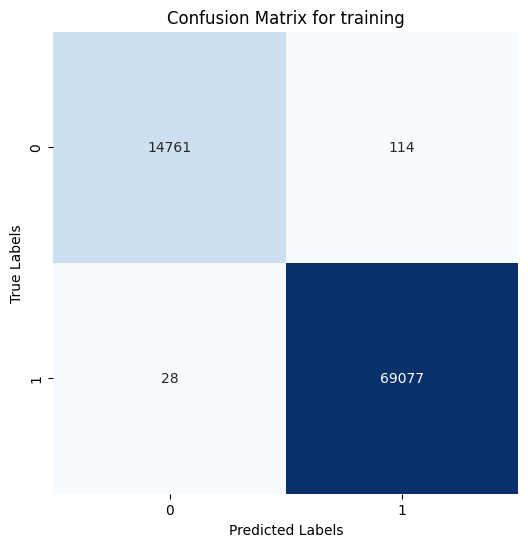

In [32]:
# Plot the confusion matrix
#contains all the elements to plot the graph
py.figure(figsize=(6, 6))
#demonstrating the relationship between variables, including time
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#A figure's axis labels can be added, and their text characteristics can be changed
py.xlabel('Predicted Labels')
#Customise the axis labels' text characteristics by adding them to a figure.
py.ylabel('True Labels')
py.title('Confusion Matrix for training')
#display of the matrix for training
py.show()

The x-axis displays the number of false positives (FPR), which is the percentage of false positive predictions relative to the total number of true negatives.
The percentage of accurate positive predictions relative to the total number of positives (the True Positive Rate, or TPR) is shown along the y-axis.
The graph is made more understandable by adding labels and a heading.
The ROC curve for the Multinomial Naive Bayesian model is then shown, illustrating the model's performance.
In layman's words, this code plots a curve to show how effectively a given model differentiates across classes. How well a model predicts outcomes is shown by its geometry and the area under the curve. We can see how well the model does compared to a guess using the graph.

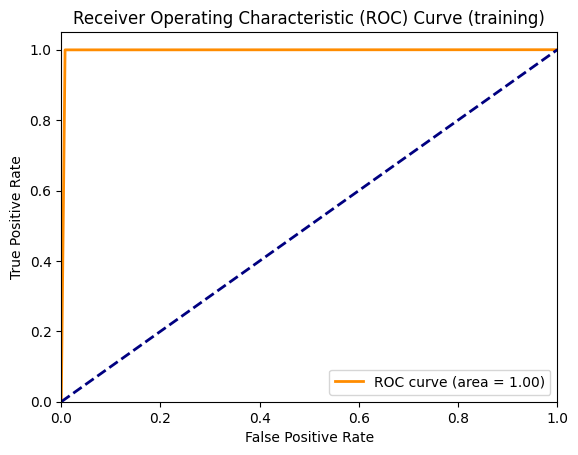

In [33]:
#while ignoring the threshold values, assign these values to the variables fpr and tpr, respectively.
#The threshold values are discarded and these values are transferred to the variables fpr and tpr, respectively.
fpr, tpr, thresholds = roc_curve(y_train_int, y_pd_labels)
#determines the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
#rounded to four decimal places, labelling the curve with the Multinomial Naive Bayes' ROC AUC score.
py.figure()
py.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#required information for plotting graph
py.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#writing limits for x and y
py.xlim([0.0, 1.0])
py.ylim([0.0, 1.05])
#set the positive label for the binary classification
py.xlabel('False Positive Rate')
#positive label for the binary classification
py.ylabel('True Positive Rate')
#title of the graph
py.title('Receiver Operating Characteristic (ROC) Curve (training)')
py.legend(loc="lower right")
#display the plotted roc curve
py.show()